In [1]:
import pandas as pd
import numpy as np

In [2]:
import xgboost as xgb

In [3]:
import tqdm

In [4]:
data = pd.read_csv('D:\DataScience\lenta\data.csv', index_col=0)

In [5]:
data

,CardHolder,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,...,sale_sum_6m_g24,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m
0,16095858,47.0,3.0,22.0,19.0,3.0,28.0,8.0,7.0,6.0,...,3141.25,356.67,237.25,283.84,3648.23,1195.37,535.42,1.7078,0.2798,0.3008
1,15906620,57.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,...,113.39,62.69,58.71,87.01,179.83,0.00,122.98,0.0000,0.0000,0.0000
2,16495466,38.0,7.0,0.0,15.0,4.0,9.0,5.0,9.0,14.0,...,1239.19,533.46,83.37,593.13,1217.43,1336.83,3709.82,0.0000,NaN,0.0803
3,16570217,65.0,6.0,3.0,25.0,2.0,10.0,14.0,11.0,8.0,...,139.68,1849.91,360.40,175.73,496.73,172.58,1246.21,0.0000,0.0000,0.0000
4,16346871,61.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,...,226.98,168.05,461.37,0.00,237.93,225.51,995.27,1.4142,0.3495,0.3495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687024,15705403,35.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,...,550.09,669.33,111.87,0.00,330.96,1173.84,119.99,2.6458,0.3646,0.3282
687025,16586008,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,28.01,0.0000,0.0000,0.0000
687026,15693616,36.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.00,0.00,0.00,0.00,0.00,449.01,0.00,0.0000,NaN,NaN
687027,15915514,37.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.00,46.72,0.00,0.00,0.00,0.00,0.00,0.0000,NaN,NaN


In [6]:
data['target'] = 0
data.loc[(data.group=='test')&(data.response_att==1), 'target'] = 1
data.loc[(data.group=='control')&(data.response_att==0), 'target'] = 1
data

,CardHolder,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,...,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m,target
0,16095858,47.0,3.0,22.0,19.0,3.0,28.0,8.0,7.0,6.0,...,356.67,237.25,283.84,3648.23,1195.37,535.42,1.7078,0.2798,0.3008,0
1,15906620,57.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,...,62.69,58.71,87.01,179.83,0.00,122.98,0.0000,0.0000,0.0000,0
2,16495466,38.0,7.0,0.0,15.0,4.0,9.0,5.0,9.0,14.0,...,533.46,83.37,593.13,1217.43,1336.83,3709.82,0.0000,NaN,0.0803,1
3,16570217,65.0,6.0,3.0,25.0,2.0,10.0,14.0,11.0,8.0,...,1849.91,360.40,175.73,496.73,172.58,1246.21,0.0000,0.0000,0.0000,0
4,16346871,61.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,...,168.05,461.37,0.00,237.93,225.51,995.27,1.4142,0.3495,0.3495,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687024,15705403,35.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,...,669.33,111.87,0.00,330.96,1173.84,119.99,2.6458,0.3646,0.3282,1
687025,16586008,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,28.01,0.0000,0.0000,0.0000,0
687026,15693616,36.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.00,0.00,0.00,0.00,449.01,0.00,0.0000,NaN,NaN,1
687027,15915514,37.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,46.72,0.00,0.00,0.00,0.00,0.00,0.0000,NaN,NaN,1


In [7]:
def custom_metric(answers, take_top_ratio=0.5):
    answers.sort_values(by='uplift', inplace=True, ascending=False)
    n_samples = int(np.ceil(answers.shape[0] * take_top_ratio))
    answers = answers.iloc[:n_samples, :]
    answers_test = answers[answers['group'] == 'test']['response_att'].sum() / \
                   answers[answers['group'] == 'test'].shape[0]
    answers_control = answers[answers['group'] == 'control']['response_att'].sum() / \
                      answers[answers['group'] == 'control'].shape[0]
    return (answers_test - answers_control) * 100

In [41]:
data1 = data
data1.gender = np.array(data1.gender=='М').astype(int)

In [9]:
from sklearn.model_selection import KFold

In [16]:
def return_feature_score():
    table = 0
    X = data1.drop(columns=['group', 'response_att', 'target'])
    y = data1['target']
    
#     X['k_var_cheque_3m_div_response_sms'] = X.k_var_cheque_3m/X.response_sms
#     X['cheque_count_12m_g48_div_response_sms'] = X.cheque_count_12m_g48/X.response_sms
#     X['cheque_count_6m_g40_div_response_sms'] = X.cheque_count_6m_g40/X.response_sms
#     X['cheque_count_6m_g32_mul_k_var_cheque_3m'] = X.cheque_count_6m_g32*X.k_var_cheque_3m
#     X['cheque_count_12m_g41_div_response_sms'] = X.cheque_count_12m_g41/X.response_sms
#     X['cheque_count_12m_g46_div_response_viber'] = X.cheque_count_12m_g46/X.response_viber
#     X['cheque_count_12m_g41_div_response_viber'] = X.cheque_count_12m_g41/X.response_viber
    
    
    score = 0
    feature_imp = np.zeros(len(data1.drop(columns=['group', 'response_att', 'target']).columns))
    for i in range(6):
        kf = KFold(n_splits=2, shuffle=True)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            clf = xgb.XGBClassifier(max_depth=2, n_estimators=70, tree_method='gpu_hist', gpu_id=0, num_parallel_tree=10, learning_rate=0.1)
            clf.fit(X_train, y_train)
            results = clf.predict_proba(X_test)
            table = data1.iloc[test_index]
            table['uplift']=np.copy(results[:,1])
            temp=(custom_metric(table))
            score+=temp
            print(temp)
    return(score/12)

In [17]:
return_feature_score()

<ipython-input-16-a6849f2fe9c7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['uplift']=np.copy(results[:,1])
<ipython-input-7-9b838c6c4c5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answers.sort_values(by='uplift', inplace=True, ascending=False)


6.040438096814979
5.998522432314809
6.089634014060988
5.8436644536564835
5.795057273486681
6.1491373162862235
6.080276485407773
5.932551284241747
6.114199105340537
5.820115038479809
5.955113195754421
5.9853527130542625


5.983671784074893

,CardHolder,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,...,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m,target
0,16095858,47.0,3.0,22.0,19.0,3.0,28.0,8.0,7.0,6.0,...,356.67,237.25,283.84,3648.23,1195.37,535.42,1.7078,0.2798,0.3008,0
1,15906620,57.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,...,62.69,58.71,87.01,179.83,0.00,122.98,0.0000,0.0000,0.0000,0
2,16495466,38.0,7.0,0.0,15.0,4.0,9.0,5.0,9.0,14.0,...,533.46,83.37,593.13,1217.43,1336.83,3709.82,0.0000,NaN,0.0803,1
3,16570217,65.0,6.0,3.0,25.0,2.0,10.0,14.0,11.0,8.0,...,1849.91,360.40,175.73,496.73,172.58,1246.21,0.0000,0.0000,0.0000,0
4,16346871,61.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,...,168.05,461.37,0.00,237.93,225.51,995.27,1.4142,0.3495,0.3495,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687024,15705403,35.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,...,669.33,111.87,0.00,330.96,1173.84,119.99,2.6458,0.3646,0.3282,1
687025,16586008,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,28.01,0.0000,0.0000,0.0000,0
687026,15693616,36.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.00,0.00,0.00,0.00,449.01,0.00,0.0000,NaN,NaN,1
687027,15915514,37.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,46.72,0.00,0.00,0.00,0.00,0.00,0.0000,NaN,NaN,1


In [10]:
features = ['response_viber']
probable = (set(data1.drop(columns=['group', 'response_att', 'target']))-set(features))
score = 0
now_score = 0
while True:
    temp=[]
    for i in tqdm.tqdm(probable):
        max_score=-1
        index=-1
        if i not in features:
            temp = features.copy()
            temp.append(i)
            now_score = return_feature_score(temp)
            if now_score>max_score:
                index = i
                max_score = now_score
    print(max_score, score)
    if max_score-score<=0:
        print('end---------')
        break
    if max_score>score:
        score = max_score
        features.append(index)
        probable-=set([index])
    print(features, score)
    
            

  0%|                                                                                                                                                                                                                                                                                          | 0/193 [00:00<?, ?it/s]


NameError: name 'return_feature_score' is not defined

In [11]:
import seaborn as sns

In [42]:

data1['age_group'] = 0
data1.age_group.loc[data1.age<=21]=1
data1.age_group.loc[(data1.age<=21)] = 1
data1.age_group.loc[(data1.age>21)&(data1.age<=35)] = 2
data1.age_group.loc[(data1.age>35)&(data1.age<=55)] = 3
data1.age_group.loc[(data1.age>55)&(data1.age<=70)] = 4
data1.age_group.loc[(data1.age>70)&(data1.age<=100)] = 5
data1

d:\mlp\venv\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,CardHolder,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,...,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m,target,age_group
0,16095858,47.0,3.0,22.0,19.0,3.0,28.0,8.0,7.0,6.0,...,237.25,283.84,3648.23,1195.37,535.42,1.7078,0.2798,0.3008,0,3
1,15906620,57.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,...,58.71,87.01,179.83,0.00,122.98,0.0000,0.0000,0.0000,0,4
2,16495466,38.0,7.0,0.0,15.0,4.0,9.0,5.0,9.0,14.0,...,83.37,593.13,1217.43,1336.83,3709.82,0.0000,NaN,0.0803,1,3
3,16570217,65.0,6.0,3.0,25.0,2.0,10.0,14.0,11.0,8.0,...,360.40,175.73,496.73,172.58,1246.21,0.0000,0.0000,0.0000,0,4
4,16346871,61.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,...,461.37,0.00,237.93,225.51,995.27,1.4142,0.3495,0.3495,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687024,15705403,35.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,...,111.87,0.00,330.96,1173.84,119.99,2.6458,0.3646,0.3282,1,2
687025,16586008,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,28.01,0.0000,0.0000,0.0000,0,2
687026,15693616,36.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.00,0.00,0.00,449.01,0.00,0.0000,NaN,NaN,1,3
687027,15915514,37.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0000,NaN,NaN,1,3


In [21]:
q = temp.groupby('age_group', as_index=False).agg({'response_sms':'mean', 'response_viber':'mean'})
q

,age_group,response_sms,response_viber
0,1,0.592201,0.196606
1,2,0.742758,0.323537
2,3,0.780169,0.291371
3,4,0.836168,0.186549
4,5,0.859629,0.111834


In [55]:
import seaborn as sns

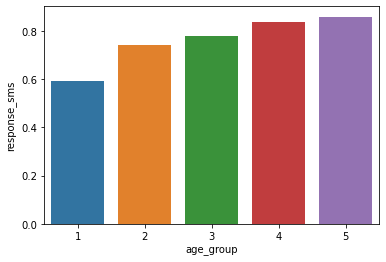

In [24]:
sns.barplot(x='age_group', y='response_sms', data=q)

In [25]:
q

,age_group,response_sms,response_viber
0,1,0.592201,0.196606
1,2,0.742758,0.323537
2,3,0.780169,0.291371
3,4,0.836168,0.186549
4,5,0.859629,0.111834


In [36]:
q2 = q[['age_group','response_sms']].append(q[['age_group','response_viber']].rename(columns={'response_viber':'response_sms'})).rename(columns={'response_sms':'response'})
group = ['sms','sms', 'sms', 'sms','sms','viber','viber','viber','viber','viber']
q2['group'] = group
q2.age_group=['<21', '21-35','35-55', '55-70', '70-100', '<21', '21-35','35-55', '55-70', '70-100']

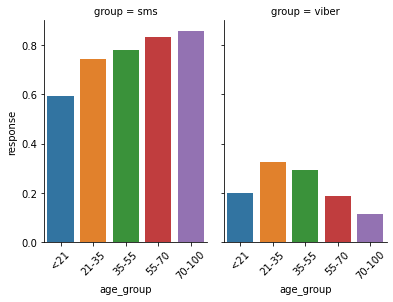

In [39]:
chart = sns.catplot(x="age_group", y="response", col="group",
                data=q2, kind="bar",
                height=4, aspect=.7);
chart.set_xticklabels(rotation=45)

In [28]:
import matplotlib.pyplot as plt

In [43]:
data1
data1['age_group'] = 0
data1[(data1.age<=21)] = 1
data1[(data1.age>21)&(data1.age<=35)] = 2
data1[(data1.age>35)&(data1.age<=55)] = 3
data1[(data1.age>55)&(data1.age<=70)] = 4
data1[(data1.age>70)&(data1.age<=100)] = 5

In [44]:
aver = (data1.sale_sum_6m_g24/data1.sale_count_6m_g24).fillna(0)+(data1.sale_sum_6m_g25/data1.sale_count_6m_g25).fillna(0)+(data1.sale_sum_6m_g32/data1.sale_count_6m_g32).fillna(0)+\
(data1.sale_sum_6m_g33/data1.sale_count_6m_g33).fillna(0)+(data1.sale_sum_6m_g44/data1.sale_count_6m_g44).fillna(0)+(data1.sale_sum_6m_g54/data1.sale_count_6m_g54).fillna(0)

In [45]:
data1['average'] = aver

In [53]:
data1

,CardHolder,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,...,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m,target,age_group,average
0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,6.0
1,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,4,6.0
2,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,6.0
3,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,4,6.0
4,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,4,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687024,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2,6.0
687025,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2,6.0
687026,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,6.0
687027,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,6.0


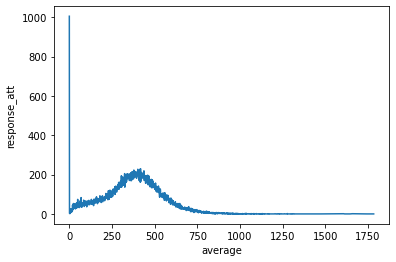

In [56]:
temp.average = temp.average.astype(int)
temp.groupby('average', as_index=False).agg({'response_att':'sum'})
sns.lineplot(x='average', y='response_att', data=temp.groupby('average', as_index=False).agg({'response_att':'sum'}))

In [40]:
temp.groupby('average', as_index=False).agg({'response_att':'sum'}).to_csv('qq.csv')

In [88]:
def return_feature_score(df):
    table = 0
    X = df.drop(columns=['group', 'response_att', 'target'])
    y = df['target']
    
#     X['k_var_cheque_3m_div_response_sms'] = X.k_var_cheque_3m/X.response_sms
#     X['cheque_count_12m_g48_div_response_sms'] = X.cheque_count_12m_g48/X.response_sms
#     X['cheque_count_6m_g40_div_response_sms'] = X.cheque_count_6m_g40/X.response_sms
#     X['cheque_count_6m_g32_mul_k_var_cheque_3m'] = X.cheque_count_6m_g32*X.k_var_cheque_3m
#     X['cheque_count_12m_g41_div_response_sms'] = X.cheque_count_12m_g41/X.response_sms
#     X['cheque_count_12m_g46_div_response_viber'] = X.cheque_count_12m_g46/X.response_viber
#     X['cheque_count_12m_g41_div_response_viber'] = X.cheque_count_12m_g41/X.response_viber
    
    
    score = 0
    feature_imp = np.zeros(len(data1.drop(columns=['group', 'response_att', 'target']).columns))
    for i in range(6):
        kf = KFold(n_splits=2, shuffle=True)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            clf = xgb.XGBClassifier(max_depth=4, n_estimators=200, tree_method='gpu_hist', gpu_id=0, num_parallel_tree=1, learning_rate=0.08)
            clf.fit(X_train, y_train)
            results = clf.predict_proba(X_test)
            table = df.iloc[test_index]
            table['uplift']=np.copy(results[:,1])
            temp=(custom_metric(table))
            score+=temp
            print(temp)
    return(score/12)

In [89]:
return_feature_score(temp)

<ipython-input-88-2c1fb2b8d411>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['uplift']=np.copy(results[:,1])
<ipython-input-87-fd02e6140c39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answers.sort_values(by='uplift', inplace=True, ascending=False)


2.2719886601352046
2.9111875463824766
2.5620125672942056
2.439377778670784
2.6355904074569505
2.3892450019228573
2.7387777217787903
2.411411403678501
2.313984499626451
2.724204689947271
2.605291723276673
2.356748921878424


2.529985076837382

In [90]:
temp

,CardHolder,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,...,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m,target,age_group,average
0,16095858,47.0,3.0,22.0,19.0,3.0,28.0,8.0,7.0,6.0,...,283.84,3648.23,1195.37,535.42,1.7078,0.2798,0.3008,0,3,343
1,15906620,57.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,...,87.01,179.83,0.00,122.98,0.0000,0.0000,0.0000,0,4,424
2,16495466,38.0,7.0,0.0,15.0,4.0,9.0,5.0,9.0,14.0,...,593.13,1217.43,1336.83,3709.82,0.0000,0.0000,0.0803,1,3,509
3,16570217,65.0,6.0,3.0,25.0,2.0,10.0,14.0,11.0,8.0,...,175.73,496.73,172.58,1246.21,0.0000,0.0000,0.0000,0,4,525
4,16346871,61.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,...,0.00,237.93,225.51,995.27,1.4142,0.3495,0.3495,0,4,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687024,15705403,35.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,...,0.00,330.96,1173.84,119.99,2.6458,0.3646,0.3282,1,2,359
687025,16586008,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,28.01,0.0000,0.0000,0.0000,0,2,28
687026,15693616,36.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.00,0.00,449.01,0.00,0.0000,0.0000,0.0000,1,3,29
687027,15915514,37.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,1,3,98


In [82]:
def return_test_score(train, test):
    X = train.drop(columns=['group', 'response_att', 'target'])
    y = train['target']
    temp = test
    temp['age_group'] = 0
    
    temp.gender = np.array(temp.gender=='М').astype(int)
    
    temp.age_group.loc[temp.age<=21]=1
    temp.age_group.loc[(temp.age<=21)] = 1
    temp.age_group.loc[(temp.age>21)&(temp.age<=35)] = 2
    temp.age_group.loc[(temp.age>35)&(temp.age<=55)] = 3
    temp.age_group.loc[(temp.age>55)&(temp.age<=70)] = 4
    temp.age_group.loc[(temp.age>70)&(temp.age<=100)] = 5
    aver = (temp.sale_sum_6m_g24/temp.sale_count_6m_g24).fillna(0)+(temp.sale_sum_6m_g25/temp.sale_count_6m_g25).fillna(0)+(temp.sale_sum_6m_g32/temp.sale_count_6m_g32).fillna(0)+\
    (temp.sale_sum_6m_g33/temp.sale_count_6m_g33).fillna(0)+(temp.sale_sum_6m_g44/temp.sale_count_6m_g44).fillna(0)+(temp.sale_sum_6m_g54/temp.sale_count_6m_g54).fillna(0)
    temp['average'] = aver
    uplift=np.zeros(len(temp))
    for i in range(20):
        clf = xgb.XGBClassifier(random_state=np.random.randint(1000000),max_depth=4, n_estimators=340, tree_method='gpu_hist', gpu_id=0, num_parallel_tree=1, learning_rate=0.08)
        clf.fit(X, y)
        uplift += clf.predict_proba(temp)[:, 1]
        print(i)
    return(uplift/20)
        

In [58]:
test = pd.read_csv('D:\\DataScience\\lenta\\test.csv', index_col=0)

In [83]:
ans = return_test_score(temp.fillna(0), test.fillna(0))
ans

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


array([0.38347304, 0.23967753, 0.25260976, ..., 0.25570208, 0.26457018,
       0.2689741 ])

In [84]:
pd.DataFrame({'CardHolder':test.CardHolder, 'uplift':ans}).to_csv('res7.csv', sep=';', index=False)

In [35]:
pd.DataFrame({'CardHolder':test.CardHolder, 'uplift':ans})

,CardHolder,uplift
0,16400802,0.399187
1,15752880,0.416297
2,15978290,0.218346
3,16604118,0.239674
4,15880709,0.318140
...,...,...
297412,16310848,0.308267
297413,15902487,0.204360
297414,16537862,0.274401
297415,16224106,0.780148


In [69]:
test.isna().astype(int).sum()

CardHolder                           0
age                               4962
cheque_count_12m_g20              3452
cheque_count_12m_g21              3452
cheque_count_12m_g25              3452
                                 ...  
stdev_days_between_visits_15d    36226
stdev_discount_depth_15d         63448
stdev_discount_depth_1m          63462
age_group                            0
average                              0
Length: 196, dtype: int64